https://www.kaggle.com/code/aselad/exploratory-data-analysis-on-the-titanic-dataset/notebook

# 1.Exploratory data analysis

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
%matplotlib inline

In [76]:
train = pd.read_csv('../data/Raw/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train = train.set_index('PassengerId')

In [78]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1. Datatypes and general statistics

In [79]:
datadict = pd.DataFrame(train.dtypes)
datadict

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [80]:
datadict['MissingVal'] = train.isnull().sum()
datadict['NUnique'] = train.nunique()
datadict['Count'] = train.count()
datadict = datadict.rename(columns = {0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891
Cabin,object,687,147,204


## 1.2.Descriptive statistics - Univariate Multivariate and Graphical

### 1.2.1.Univariate

In [81]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [82]:
train.Survived.value_counts(normalize = True) #with normalize command we will directly get the percentage 

0    0.616162
1    0.383838
Name: Survived, dtype: float64

/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/valedipalo/venvs/demoenv39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

<AxesSubplot:xlabel='Age', ylabel='Density'>

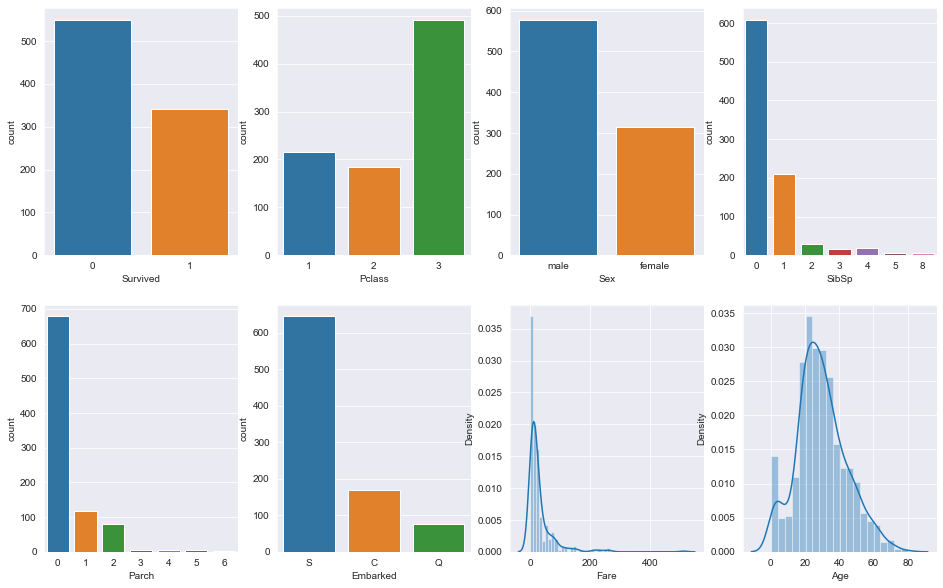

In [83]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.countplot('Survived',data=train,ax=axes[0,0])
sns.countplot('Pclass',data=train,ax=axes[0,1])
sns.countplot('Sex',data=train,ax=axes[0,2])
sns.countplot('SibSp',data=train,ax=axes[0,3])
sns.countplot('Parch',data=train,ax=axes[1,0])
sns.countplot('Embarked',data=train,ax=axes[1,1])

sns.distplot(train['Fare'], kde=True,ax=axes[1,2])
sns.distplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

## 1.2.2. Bivariate analysis 
Is important because now we are going to evaluate each category based in relation with the outcome variable

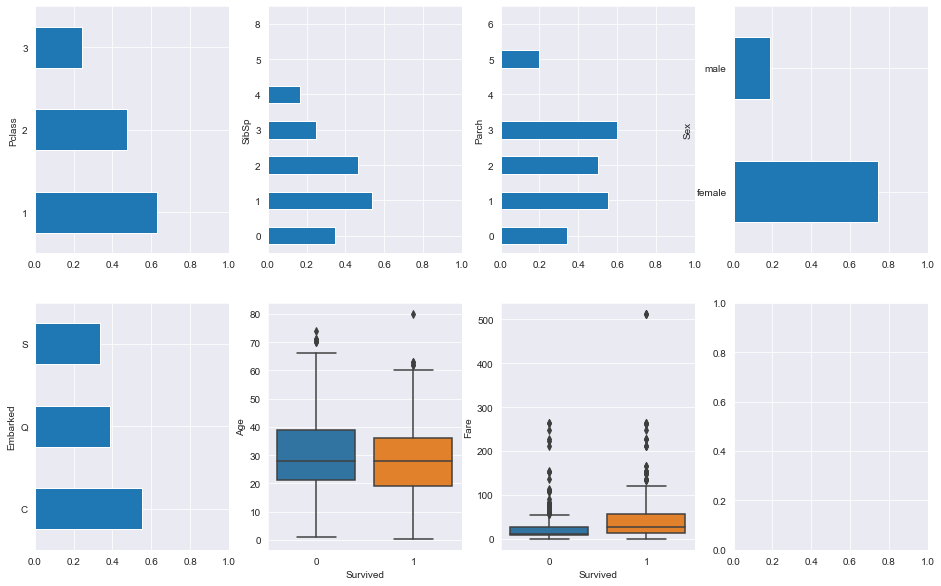

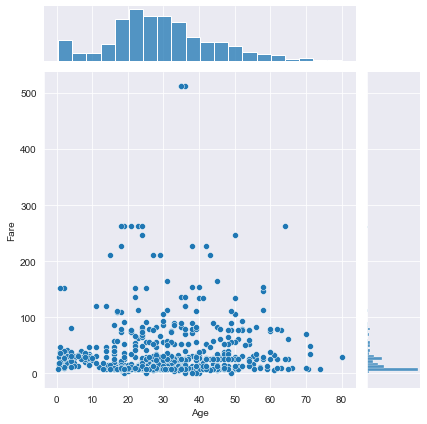

In [84]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))

#categorical VS categorical 
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])

#categorical VS continuos 
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

#Extra: continuos VS continuos 
sns.jointplot(x="Age", y="Fare", data=train, ax=axesbi[1,3])

## 1.2.3. Multivariate - Correlation matrix 

/var/folders/2b/chc7yrw11fb6c5_x7rbny1lw0000gn/T/ipykernel_61937/2045030077.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

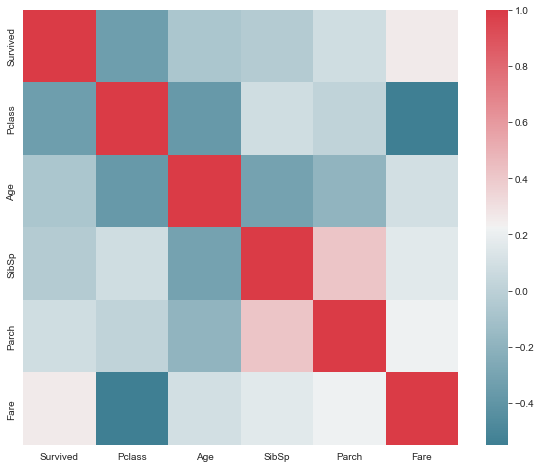

In [85]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# 2.Feature engineering 

In [47]:
train['Ticket_First']=train.Ticket.str[0]

In [48]:
train['FamilyCount']=train.SibSp+train.Parch

In [49]:
train['Cabin_First']=train.Cabin.str[0]

In [50]:
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [51]:
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


# 3.Preprocessing

## 3.1 Missing and Zero values 

### 3.1.1 Fare 

In [52]:
print((train.Fare == 0).sum())

15


In [53]:
train.Fare = train.Fare.replace(0, np.NaN)

In [54]:
print((train.Fare == 0).sum())

0


In [55]:
train[train.Fare.isnull()].index

Int64Index([180, 264, 272, 278, 303, 414, 467, 482, 598, 634, 675, 733, 807,
            816, 823],
           dtype='int64', name='PassengerId')

In [56]:
train.Fare.mean()

32.75564988584475

In [57]:
train.Fare.fillna(train.Fare.mean(),inplace = True) 

In [58]:
#verify that there are no null 
train[train.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,


### 3.1.2 Age

In [59]:
print((train.Age == 0).sum())

0


In [60]:
train.Age.fillna(train.Age.mean(),inplace=True)

In [61]:
train[train.Age.isnull()]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,


In [62]:
train.Age = train.Age.apply(int)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_First,FamilyCount,Cabin_First,title
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,A,1,NaN,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,P,1,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,S,0,NaN,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,1,C,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,3,0,NaN,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,2,0,NaN,Rev.
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,0,B,Miss.
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S,W,3,NaN,Miss.


### 3.1.3 Cabin


In [63]:
train.Cabin.isnull().mean()

0.7710437710437711

We see that a majority 77% of the Cabin variable has missing values. Hence will drop the column from training a machine learnign algorithem

# 4.Statistical modeling 

In [64]:
train.columns 

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Ticket_First', 'FamilyCount',
       'Cabin_First', 'title'],
      dtype='object')

In [65]:
# we will select just the columns that we want to use in our analysis 
trainML = train[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Ticket_First', 'FamilyCount',
       'Cabin_First', 'title']]
trainML = trainML.dropna()

In [66]:
trainML.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Ticket_First    0
FamilyCount     0
Cabin_First     0
title           0
dtype: int64

## 4.1.Regression on survival on age 

In [68]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [69]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
(y == y_predict).mean()

0.681592039800995

## 4.2.Regression on survival on sex - Create dummy variables 

In [70]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
(y == y_predict).mean()

0.746268656716418

## 4.3 Regression on Pclass

In [71]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6616915422885572

## 4.4. Random forest on numerical variables


In [73]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()


0.9950248756218906